## Part 1

## Main Import Commands

In [1]:
import os
import tensorflow_datasets as tfds 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
from tqdm.notebook import tqdm
  
import tensorflow_hub as hub
from tensorflow import keras 
import tensorflow as tf
from IPython.display import Image 
import matplotlib.pyplot as plt

## Installation Commands

- Kindly uncomment the below commands if the models require installaion.

In [2]:
'''Uncomment the following line to download the SpaCy Danish language model'''
'''Source: https://spacy.io/models/da#da_core_news_lg'''
# !python -m spacy download da_core_news_lg

'Source: https://spacy.io/models/da#da_core_news_lg'

In [3]:
'''Uncomment the following line to download the install the required transfomers model'''
# !pip install -q transformers  rouge-score sentence-transformers

'Uncomment the following line to download the install the required transfomers model'

## Data Retrieval from a Pre-downloaded Subset and Basic Preprocessing

In [4]:
arts = pd.read_csv('articles_summaries.csv')
arts

Unnamed: 0  Unnamed 0  \
0              0          0   
1              1          1   
2              2          2   
3              3          3   
4              4          4   
...          ...        ...   
9015        9015       9015   
9016        9016       9016   
9017        9017       9017   
9018        9018       9018   
9019        9019       9019   

                                                article  \
0     RokokoPosten er en parodi på den aktuelle nyhe...   
1     Edward Kaplan ligner ikke det, han påstår, at ...   
2     Novo Nordisk Fonden vil donere flere penge til...   
3     Ledelsen på Herlufsholm Skole har i flere dage...   
4     Som det yngste af de fire gamle partier runder...   
...                                                 ...   
9015  Godmorgen og velkommen til denne tirsdags poli...   
9016  Udsigten er formidabel, når man står på spidse...   
9017  Et foto viser en smukt arrangeret blomsterbuke...   
9018  Når beskæftigelsesminister Mette Frederiksen (...   
9019  Novo Nordisks kommende børsnotering af NNIT er...   

                                                summary  
0     RokokoPosten: Alternativet mener ikke, man ska...  
1     Colorado er en svingstat, men den er ved at bl...  
2     Det er fint, at Novo Nordisk Fonden vil hjælpe...  
3     Kendt kostskole tilkaldte specialist efter mul...  
4     På mandag fylder Det konservative Folkeparti 1...  
...                                                 ...  
9015  Dagens overblik: Ekstra Bladet skriver, at »bo...  
9016  Lydskulpturen »Vindspejlet«, der de kommende m...  
9017  Allan Thullesen rapporterer som familiefar fra...  
9018  Med reformerne af kontanthjælp og SU er regeri...  
9019  En lang række danske og internationale kapital...  

[9020 rows x 4 columns]

In [5]:
arts = arts.dropna()
arts = arts.reset_index()
del arts['index']
del arts['Unnamed: 0']
del arts['Unnamed 0']
arts

article  \
0     RokokoPosten er en parodi på den aktuelle nyhe...   
1     Edward Kaplan ligner ikke det, han påstår, at ...   
2     Novo Nordisk Fonden vil donere flere penge til...   
3     Ledelsen på Herlufsholm Skole har i flere dage...   
4     Som det yngste af de fire gamle partier runder...   
...                                                 ...   
9014  Godmorgen og velkommen til denne tirsdags poli...   
9015  Udsigten er formidabel, når man står på spidse...   
9016  Et foto viser en smukt arrangeret blomsterbuke...   
9017  Når beskæftigelsesminister Mette Frederiksen (...   
9018  Novo Nordisks kommende børsnotering af NNIT er...   

                                                summary  
0     RokokoPosten: Alternativet mener ikke, man ska...  
1     Colorado er en svingstat, men den er ved at bl...  
2     Det er fint, at Novo Nordisk Fonden vil hjælpe...  
3     Kendt kostskole tilkaldte specialist efter mul...  
4     På mandag fylder Det konservative Folkeparti 1...  
...                                                 ...  
9014  Dagens overblik: Ekstra Bladet skriver, at »bo...  
9015  Lydskulpturen »Vindspejlet«, der de kommende m...  
9016  Allan Thullesen rapporterer som familiefar fra...  
9017  Med reformerne af kontanthjælp og SU er regeri...  
9018  En lang række danske og internationale kapital...  

[9019 rows x 2 columns]

In [6]:
train_df = arts[:(int(0.8*len(arts)))]
test_df = arts[(int(0.8*len(arts))):]

In [7]:
from transformers import AutoTokenizer, AutoModel 

nlp = spacy.load('da_core_news_lg')
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/paraphrase-MiniLM-L3-v2')

## Data Analysis

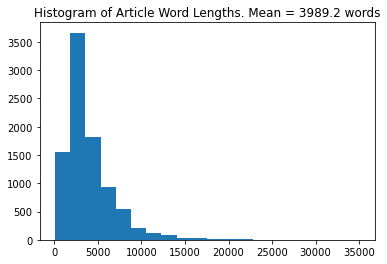

In [8]:
art_lengths = [ len(x) for x in arts.article] 
plt.hist(art_lengths, bins=20);
plt.title("Histogram of Article Word Lengths. Mean = " + str(round(sum(art_lengths)/ len(art_lengths),1)) + " words" );

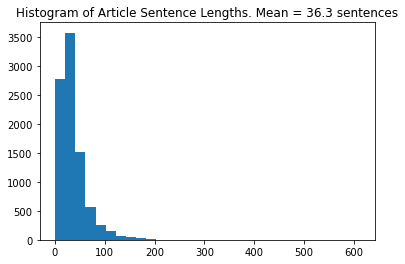

In [9]:
art_sent_lengths = [ x.count('.') for x in arts.article] 
plt.hist(art_sent_lengths, bins=30);
plt.title("Histogram of Article Sentence Lengths. Mean = " + str(round(sum(art_sent_lengths)/ len(art_sent_lengths),1)) + " sentences" );

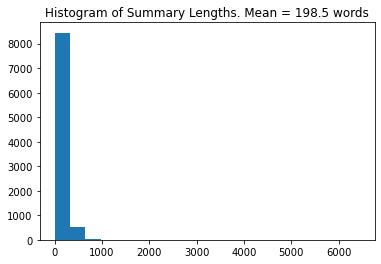

In [10]:
sum_lengths = [ len(x) for x in arts.summary] 
plt.hist(sum_lengths, bins=20);
plt.title("Histogram of Summary Lengths. Mean = " + str(round(sum(sum_lengths)/ len(sum_lengths),1)) + " words" );

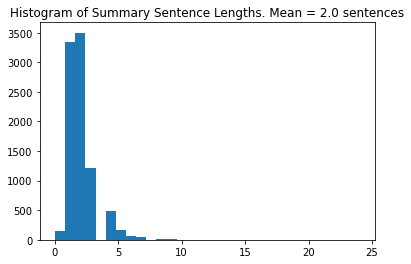

In [11]:
sum_sent_lengths = [ x.count('.') for x in arts.summary] 
plt.hist(sum_sent_lengths, bins=30);
plt.title("Histogram of Summary Sentence Lengths. Mean = " + str(round(sum(sum_sent_lengths)/ len(sum_sent_lengths),1)) + " sentences" );

## Export Data Subset for Reuse 

In [12]:
# train_df.highlights = train_df.summary
# test_df.highlights = test_df.summary

In [13]:
train_df.rename(columns = {'summary':'highlight'}, inplace = True)
test_df.rename(columns = {'summary':'highlight'}, inplace = True)

C:\Users\Tom\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [14]:
# train_df.rename(columns = {'summary':'highlight'}, inplace = True)

test_df.highlight = test_df.highlight.dropna()
test_df.highlight.reset_index()
test_df = test_df.dropna()
test_df

C:\Users\Tom\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


article  \
7215  Man fik et chok, da man åbnede sin Berlinger f...   
7216  De Radikales leder, Morten Østergaard, melder ...   
7217  »Det er muligt, jeg er respektløs overfor bili...   
7218  overlæge og lektor ved Københavns Universitet ...   
7219  En solid omgang venstreorienteret fake news hæ...   
...                                                 ...   
9014  Godmorgen og velkommen til denne tirsdags poli...   
9015  Udsigten er formidabel, når man står på spidse...   
9016  Et foto viser en smukt arrangeret blomsterbuke...   
9017  Når beskæftigelsesminister Mette Frederiksen (...   
9018  Novo Nordisks kommende børsnotering af NNIT er...   

                                              highlight  
7215  Man fik et chok, da man åbnede sin Berlinger f...  
7216  De Radikale peger entydigt på Mette Frederikse...  
7217  Tonen for og imod en havnetunnel skærpes på Kø...  
7218  Fremtidsudsigter. Prioritering betyder fravalg...  
7219  »Vi bekæmper ikke parallelsamfund ved at skabe...  
...                                                 ...  
9014  Dagens overblik: Ekstra Bladet skriver, at »bo...  
9015  Lydskulpturen »Vindspejlet«, der de kommende m...  
9016  Allan Thullesen rapporterer som familiefar fra...  
9017  Med reformerne af kontanthjælp og SU er regeri...  
9018  En lang række danske og internationale kapital...  

[1804 rows x 2 columns]

In [15]:
os.makedirs("data/", exist_ok=True) 
os.makedirs("data/test_da1860", exist_ok=True) 
os.makedirs("data/train_da1860", exist_ok=True) 


test_df.to_json("data/test_da1860/test.json")
train_df.to_json("data/train_da1860/train.json")

## Data Preprocessing - Extacting Sentences with Spacy

In [16]:
def get_dicts(df, folder="test"):   
  sents_dict = {}
  doc_dict = { i: {"article": df.article[i], "highlight": df.highlight[i]} for i in df.index }
  raw_docs = [ doc_dict[k]["article"] for k in doc_dict.keys()]

  doc_sents = {}
  sents_list = []
  raw_sents = [] 
  i = 0
  min_sent_length = 18 # min_sent_length varies in experiments between 14, 18 and 22.
  for k in tqdm(doc_dict.keys()):
    article = doc_dict[k]["article"]  
    highlight = doc_dict[k]["highlight"] 
    sents = nlp(article).sents
    doc_sent_ids = [] 
    for sent in sents:
      if (len(sent)) > min_sent_length:
        sents_dict[i] = {"docid":k, "text": str(sent)} 
        sents_list.append({"sentid":i, "docid":k, "text": str(sent) }) 
        raw_sents.append(str(sent))
        i += 1  
         
  return doc_dict, sents_list

test_doc_dict, test_sents_list = get_dicts(test_df, folder="test_da")
train_doc_dict, train_sents_list = get_dicts(train_df, folder="train_da")  

  0%|          | 0/1804 [00:00<?, ?it/s]

  0%|          | 0/7215 [00:00<?, ?it/s]

## Get Labels and Balanced Dataset

- Get labels for each sentence
- The dataset is unbalanced (most sentences are unlikely to be in the summary). 
- Construct new dataset of examples that balances positive examples with negative examples.

In [17]:
from rouge_score import rouge_scorer 
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

def get_rouge_score(text, highlights, metric="rougeL"):
  max_score = 0
  for h_text in highlights:
    score =  scorer.score(text, h_text)[metric].fmeasure
    if score > max_score:
      max_score = score 
  return max_score 


def get_label(sent, doc_dict,  score_threshold = 0.60): # score_threshold varies in experiments between 0.50, 0.55 and 0.60
  sent_id, doc_id, sentence = sent["sentid"], sent["docid"], sent["text"] 
  highlights = doc_dict[doc_id]["highlight"].split("\n")
  doc = doc_dict[doc_id]["article"]

  label_score = get_rouge_score(sentence, highlights)
    
  # Normalise label to 0/1 based on rogue score threshold
  label_score = 0 if label_score < score_threshold else 1 
  return (sentence, doc, label_score)
  
def sub_sample(sents_batch, doc_dict, neg_multiplier=2):
  # get labels 
  vals = [get_label(x, doc_dict)  for x in sents_batch] 

  # Construct arrays of sentences, corresponding documents and labels  
  sents, docs, y = [], [], [] 
  for row in vals:
    sents.append(row[0])
    docs.append(row[1])
    y.append(row[2])
   

  # Get balanced number of positive and negative
  sub_df = pd.DataFrame.from_dict({"sents":sents, "docs":docs, "y":y}) 
  pos_df = sub_df[sub_df.y == 1]
  neg_df = sub_df[sub_df.y == 0]

  sub_neg_df = neg_df.sample(len(pos_df)*neg_multiplier) 
  balanced_df = pos_df.append(sub_neg_df)
  
  return balanced_df



In [18]:
train_bdf = sub_sample(train_sents_list, train_doc_dict)
test_bdf = sub_sample(test_sents_list, test_doc_dict)

train_bdf.to_json("data/train_bdf_da1860.json") # File name is determined by the min_sent_length and score threshold values
test_bdf.to_json("data/test_bdf_da1860.json")

!gsutil cp -r data $sum_dir

'gsutil' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
# Define a directory to save data 
sum_dir = ""
!gsutil cp -r data $sum_dir 

'gsutil' is not recognized as an internal or external command,
operable program or batch file.
